In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import cov
import csv
from datetime import datetime, timedelta
from scipy.stats import pearsonr,spearmanr

In [2]:
df = pd.read_excel('DATA/180 (в купол обрушения).xlsx', sheet_name=None, usecols="D:F", skiprows=5,nrows=24, header = None, names = ['Концентрация CH4','Расход смеси, м3/мин','Расход CH4, м3/мин' ])

In [3]:
df = pd.read_excel('DATA/180 (в купол обрушения).xlsx', sheet_name=None, usecols="D:F", skiprows=5,nrows=24, header = None, names = ['CMM concentration','Mixture consumption, m3 / min','CH4 consumption, m3 / min' ])

In [4]:
cdf = pd.concat(df,axis=0, join="inner", ignore_index=True, keys=None, levels=None, names=None, verify_integrity=False, copy=True)

In [5]:
cdf.to_csv('DATA_EXPORT/cdf.csv', index = False)

In [24]:
start_date='2021-02-01 07:00:00'
end_date='2021-03-01 06:00:00'
start_date = datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')
end_date = datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S')
timestamp=[]
timestamp=pd.DataFrame(pd.date_range(start=start_date, end=end_date, freq='H'), columns=['timestamp'])
print(timestamp)
cdf['timestamp']=timestamp
cdf.set_index('timestamp', inplace=True)

              timestamp
0   2021-02-01 07:00:00
1   2021-02-01 08:00:00
2   2021-02-01 09:00:00
3   2021-02-01 10:00:00
4   2021-02-01 11:00:00
..                  ...
667 2021-03-01 02:00:00
668 2021-03-01 03:00:00
669 2021-03-01 04:00:00
670 2021-03-01 05:00:00
671 2021-03-01 06:00:00

[672 rows x 1 columns]


In [28]:
cdf.tail(26)

,CMM concentration,"Mixture consumption, m3 / min","CH4 consumption, m3 / min"
timestamp,,,
2021-02-28 05:00:00,69.3,20,13.86
2021-02-28 06:00:00,47.8,20,9.56
2021-02-28 07:00:00,43.6,20,8.72
2021-02-28 08:00:00,46.8,20,9.36
2021-02-28 09:00:00,49.2,20,9.84
2021-02-28 10:00:00,56.1,20,11.22
2021-02-28 11:00:00,51.8,20,10.36
2021-02-28 12:00:00,46.4,20,9.28
2021-02-28 13:00:00,70.1,20,14.02


In [7]:
#plt.figure(figsize=(13, 5))
#plt.xlabel('Time')
#plt.ylabel('Parameter')
#plt.ylim(0, 100)
#plt.plot(cdf)
#plt.show()

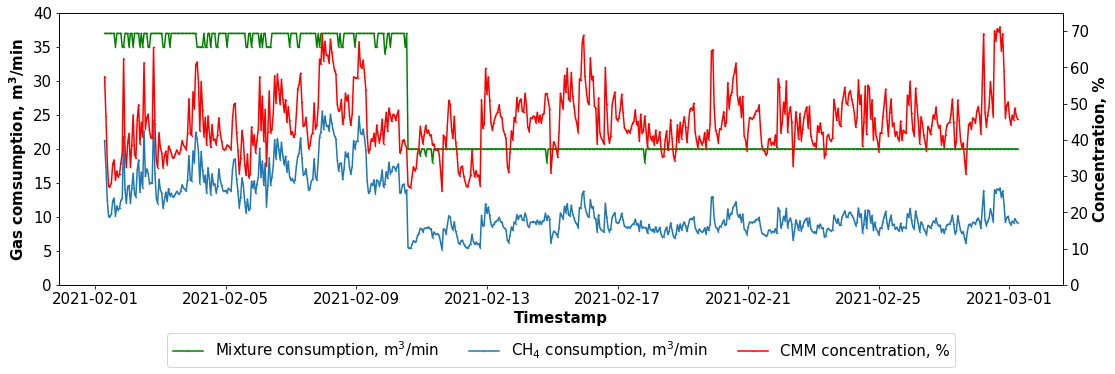

In [101]:
start, end = '2021-02-01 07:00:00', '2021-03-01 06:00:00'
fig, ax = plt.subplots(figsize=(18, 5))
ax2 = ax.twinx()
ax.plot(cdf.loc[start:end, 'Mixture consumption, m3 / min'],
marker='.', linestyle='-', linewidth=1.5, markersize=1, label='Mixture consumption, $\mathregular{m^3}$/min', color='green')
ax.plot(cdf.loc[start:end, 'CH4 consumption, m3 / min'],
marker='.', linestyle='-', linewidth=1.5, markersize=1, label='$\mathregular{CH_4}$ consumption, $\mathregular{m^3}$/min')
ax2.plot(cdf.loc[start:end, 'CMM concentration'],
marker='.', linestyle='-', linewidth=1.5, markersize=1, color='red', label='CMM concentration, %')
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.set_xlabel('Timestamp', loc='center', fontweight='bold')
ax.set_ylabel('Gas comsumption, $\mathregular{m^3}$/min', fontweight='bold')
ax2.set_ylabel('Concentration, %', fontweight='bold')
ax.legend(h1+h2, l1+l2, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
ax2.set_ylim([0, 75])
ax.set_ylim([0, 40])
plt.rcParams.update({'font.size': 15})

Расчет корреляции двух рядов данных

In [ ]:
#Расчет корреляции двух рядов данных
Indicators = {'System type': ['SS','PS','CL','IP','IR','DR'], 'R, bit/s': [133.405, 162.922,786.134,1146.229,444.442,1740.166],
        'MTBF (year)': [37,441,438,448,51,27917],
                }
df = pd.DataFrame(Indicators, columns = ['System type', 'R, bit/s','MTBF (year)'])

print (df)

In [ ]:
R=df.iloc[:,1],
MTBF=df.iloc[:,2]
print (MTBF)

In [ ]:
# calculate Pearson's correlation
covariance = cov(R, MTBF)
corr, _ = pearsonr(df.iloc[:,1], df.iloc[:,2])
corr1, _ = spearmanr(df.iloc[:,1], df.iloc[:,2])
print(covariance, 'Pearsons correlation: %.3f' % corr, 'Spearmans correlation: %.3f' % corr1)